# Отчёт по производительности для задания №1 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/1_log.txt").read_text(encoding="utf-8")
#pd.set_option('display.max_rows', 110)

size_re = re.compile(r"Vector size:\s*(\d+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"(No reduction|Reduction):\s*([0-9\.]+)\s*ms\s*\(speedup:\s*([0-9\.]+)x,\s*efficiency:\s*([0-9\.]+)\)")

records = []
current_size = None
lines = text.splitlines()

for line in lines:
    m_size = size_re.search(line)
    if m_size:
        current_size = int(m_size.group(1))
        continue
    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        continue
    m_time = time_re.search(line)
    if m_time:
        method = m_time.group(1)
        time_ms = float(m_time.group(2))
        speedup = float(m_time.group(3))
        efficiency = float(m_time.group(4))
        records.append({
            'size': current_size,
            'threads': threads,
            'method': method,
            'time_ms': time_ms,
            'speedup': speedup,
            'efficiency': efficiency
        })

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df


Rows: 96


,size,threads,method,time_ms,speedup,efficiency
0,100000,1,No reduction,2.218680,1.000000,1.000000
1,100000,1,Reduction,0.319100,1.000000,1.000000
2,100000,2,No reduction,21.224500,0.104534,0.052267
3,100000,2,Reduction,0.176217,1.810840,0.905419
4,100000,3,No reduction,19.807900,0.112010,0.037337
...,...,...,...,...,...,...
91,5000000,10,Reduction,2.394060,6.402860,0.640286
92,5000000,11,No reduction,3453.550000,0.027447,0.002495
93,5000000,11,Reduction,2.770240,5.533390,0.503035
94,5000000,12,No reduction,10244.900000,0.009253,0.000771


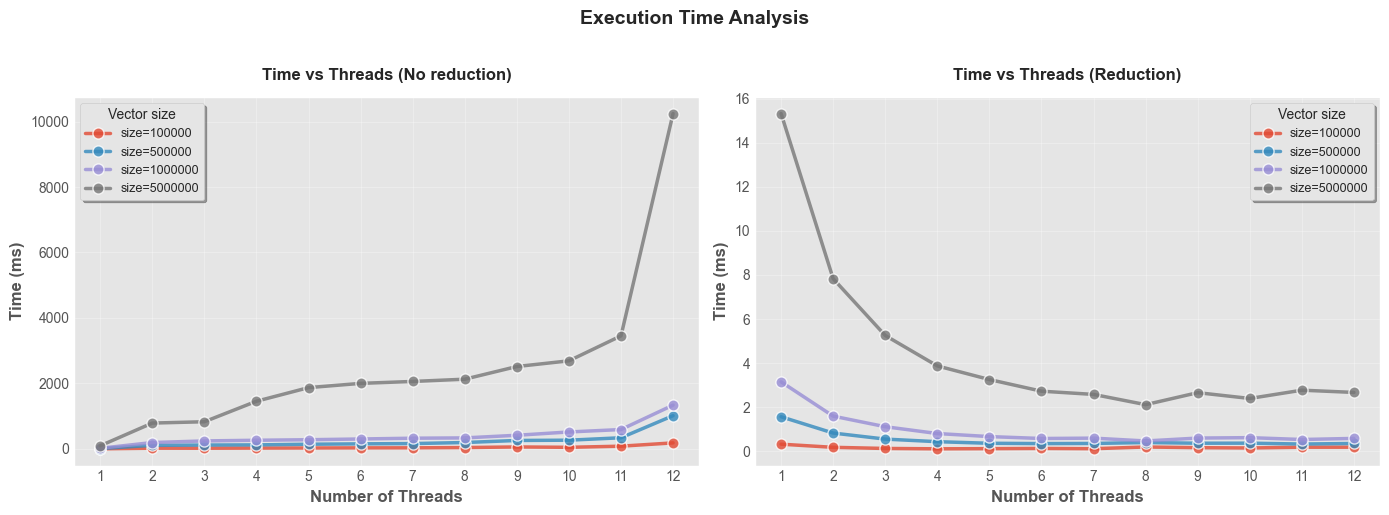

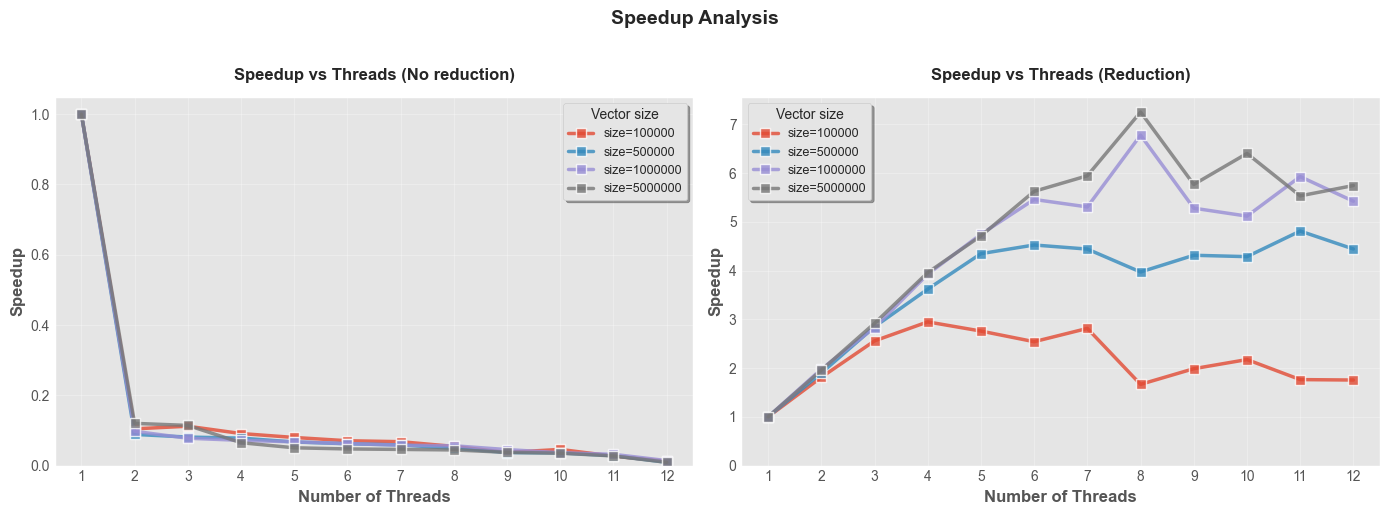

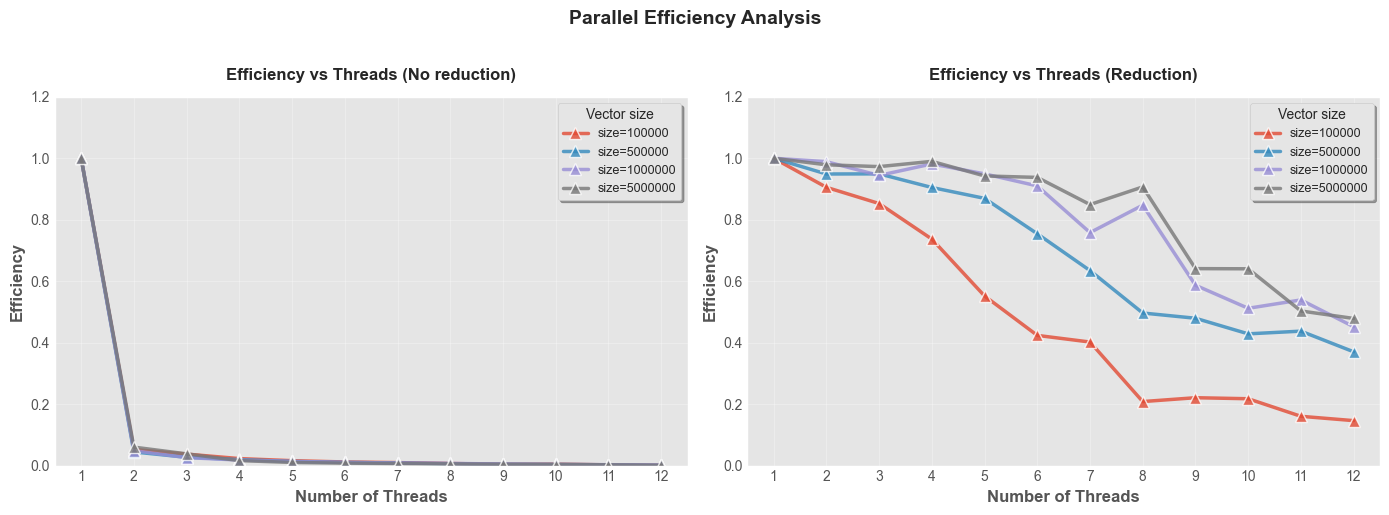

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

sizes = sorted(df['size'].unique())
threads = sorted(df['threads'].unique())
methods = ['No reduction', 'Reduction']

# 1) Time vs Threads
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for ax, method in zip(axes, methods):
    for s in sizes:
        sub = df[(df['size'] == s) & (df['method'] == method)].sort_values('threads')
        ax.plot(sub['threads'], sub['time_ms'], 
                marker='o', 
                linewidth=2.5,
                markersize=8,
                markeredgewidth=1,
                markeredgecolor='white',
                alpha=0.8,
                label=f'size={s}')
    ax.set_title(f'Time vs Threads ({method})', fontweight='bold', pad=12, fontsize=12)
    ax.set_xlabel('Number of Threads', fontweight='bold')
    ax.set_ylabel('Time (ms)', fontweight='bold')
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    ax.set_xticks(threads)
    ax.set_xlim(min(threads)-0.5, max(threads)+0.5)
    ax.legend(title='Vector size', fontsize=9, title_fontsize=10,
             frameon=True, fancybox=True, shadow=True)

fig.suptitle('Execution Time Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# 2) Speedup vs Threads
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for ax, method in zip(axes, methods):
    for s in sizes:
        sub = df[(df['size'] == s) & (df['method'] == method)].sort_values('threads')
        ax.plot(sub['threads'], sub['speedup'], 
                marker='s', 
                linewidth=2.5,
                markersize=7,
                markeredgewidth=1,
                markeredgecolor='white',
                alpha=0.8,
                label=f'size={s}')
    ax.set_title(f'Speedup vs Threads ({method})', fontweight='bold', pad=12, fontsize=12)
    ax.set_xlabel('Number of Threads', fontweight='bold')
    ax.set_ylabel('Speedup', fontweight='bold')
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    ax.set_xticks(threads)
    ax.set_xlim(min(threads)-0.5, max(threads)+0.5)
    ax.set_ylim(bottom=0)
    ax.legend(title='Vector size', fontsize=9, title_fontsize=10,
             frameon=True, fancybox=True, shadow=True)

fig.suptitle('Speedup Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# 3) Efficiency vs Threads
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for ax, method in zip(axes, methods):
    for s in sizes:
        sub = df[(df['size'] == s) & (df['method'] == method)].sort_values('threads')
        ax.plot(sub['threads'], sub['efficiency'], 
                marker='^', 
                linewidth=2.5,
                markersize=8,
                markeredgewidth=1,
                markeredgecolor='white',
                alpha=0.8,
                label=f'size={s}')
    ax.set_title(f'Efficiency vs Threads ({method})', fontweight='bold', pad=12, fontsize=12)
    ax.set_xlabel('Number of Threads', fontweight='bold')
    ax.set_ylabel('Efficiency', fontweight='bold')
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    ax.set_xticks(threads)
    ax.set_xlim(min(threads)-0.5, max(threads)+0.5)
    ax.set_ylim(bottom=0, top=1.2)
    ax.legend(title='Vector size', fontsize=9, title_fontsize=10,
             frameon=True, fancybox=True, shadow=True)

fig.suptitle('Parallel Efficiency Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()